In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [2]:
import pandas as pd

data = pd.DataFrame(X)
data.insert(784, "label", y)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [3]:
X_train[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

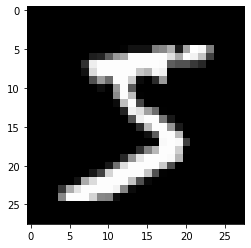

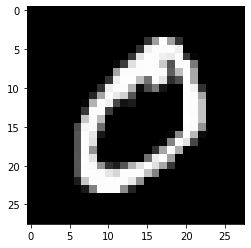

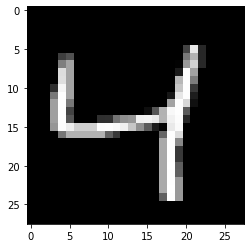

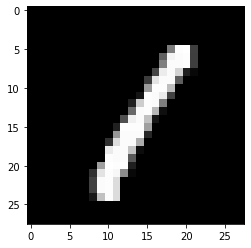

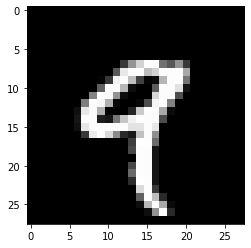

In [4]:
import matplotlib.pyplot as plt
for i in range(5):
  plt.imshow(X[i].reshape((28, 28)), cmap='gray')
  plt.show()

In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=1, activation = "logistic")
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation = "logistic")
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation = "logistic")

In [6]:
mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

C:\Users\Mustafa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [7]:
predictions_NN = mlp.predict(X_test)
predictions_NN

array(['3', '4', '1', ..., '4', '0', '1'], dtype='<U1')

In [8]:
predictions_NN1 = mlp1.predict(X_test)
predictions_NN1

array(['0', '4', '1', ..., '9', '0', '1'], dtype='<U1')

In [9]:
predictions_NN2 = mlp2.predict(X_test)
predictions_NN2

array(['0', '4', '1', ..., '9', '0', '1'], dtype='<U1')

Actual Value: 0
Predicted Value: 0


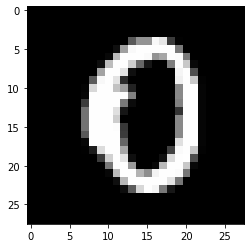

In [10]:
print(f"Actual Value: {y_test[0]}")
print(f"Predicted Value: {predictions_NN2[0]}")


plt.imshow(X_test[0].reshape((28, 28)), cmap='gray')
plt.show()

Actual Value: 4
Predicted Value For 1 Hidden Layer: 4
Predicted Value For 100 Hidden Layer: 4
Predicted Value For 1000 Hidden Layer: 4


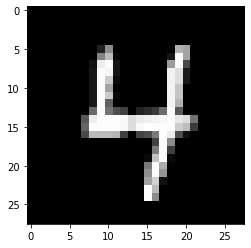

In [11]:
print(f"Actual Value: {y_test[1]}")
print(f"Predicted Value For 1 Hidden Layer: {predictions_NN[1]}")
print(f"Predicted Value For 100 Hidden Layer: {predictions_NN1[1]}")
print(f"Predicted Value For 1000 Hidden Layer: {predictions_NN2[1]}")


plt.imshow(X_test[1].reshape((28, 28)), cmap='gray')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions_NN)

array([[1597,   48,    0,  317,    4,    0,    6,    5,   99,    1],
       [  15, 1812,    0,   24,    0,    0,  297,  110,  123,    4],
       [1391,  125,    0,  318,   31,    0,   23,   38,  175,   14],
       [1255,  153,    0,  426,    4,    0,   35,   27,  209,    8],
       [   5,   22,    0,    0, 1658,    0,    8,   84,    6,  221],
       [ 522,  301,    0,  553,    5,    0,   29,   55,  424,   11],
       [  37,  771,    0,   92,   50,    0,  307,  522,  159,  107],
       [   3,  221,    0,   13,  203,    0,  182, 1110,   24,  433],
       [ 253,  529,    0,  508,    3,    0,   60,   65,  605,   19],
       [  15,   44,    0,    9,  972,    0,   16,  262,   15,  793]],
      dtype=int64)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_NN))

              precision    recall  f1-score   support

           0       0.31      0.77      0.45      2077
           1       0.45      0.76      0.57      2385
           2       0.00      0.00      0.00      2115
           3       0.19      0.20      0.19      2117
           4       0.57      0.83      0.67      2004
           5       0.00      0.00      0.00      1900
           6       0.32      0.15      0.20      2045
           7       0.49      0.51      0.50      2189
           8       0.33      0.30      0.31      2042
           9       0.49      0.37      0.42      2126

    accuracy                           0.40     21000
   macro avg       0.31      0.39      0.33     21000
weighted avg       0.32      0.40      0.34     21000



C:\Users\Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
confusion_matrix(y_test, predictions_NN1)

array([[2047,    0,    1,    0,    3,    5,   15,    1,    4,    1],
       [   0, 2352,   11,    5,    3,    1,    4,    5,    4,    0],
       [   4,    2, 2057,    6,   10,    2,    5,   10,   17,    2],
       [   2,    3,   23, 2025,    0,   30,    0,    8,   16,   10],
       [   1,    1,    5,    0, 1952,    1,   11,    7,    3,   23],
       [   5,    2,    4,   10,    4, 1842,   12,    2,    9,   10],
       [   3,    3,    2,    0,   12,   13, 2004,    3,    5,    0],
       [   0,    8,   11,    3,    8,    4,    1, 2134,    4,   16],
       [   5,   11,    7,   14,    6,   10,    7,    0, 1972,   10],
       [   5,    1,    1,    7,   24,   10,    3,   13,    6, 2056]],
      dtype=int64)

In [15]:
print(classification_report(y_test,predictions_NN1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2385
           2       0.97      0.97      0.97      2115
           3       0.98      0.96      0.97      2117
           4       0.97      0.97      0.97      2004
           5       0.96      0.97      0.96      1900
           6       0.97      0.98      0.98      2045
           7       0.98      0.97      0.98      2189
           8       0.97      0.97      0.97      2042
           9       0.97      0.97      0.97      2126

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [16]:
confusion_matrix(y_test, predictions_NN2)

array([[2063,    0,    2,    0,    0,    3,    5,    1,    2,    1],
       [   1, 2363,    7,    3,    2,    0,    2,    2,    2,    3],
       [   3,    3, 2080,    4,    3,    1,    1,    7,   12,    1],
       [   0,    2,   15, 2061,    0,   14,    0,    8,   11,    6],
       [   1,    1,    3,    2, 1960,    1,    4,    4,    3,   25],
       [   3,    0,    4,    6,    4, 1856,   10,    1,   11,    5],
       [  10,    2,    1,    1,   10,   14, 2002,    2,    3,    0],
       [   3,    5,   10,    3,    9,    2,    1, 2139,    4,   13],
       [   4,   14,    4,   13,    3,    2,    6,    1, 1984,   11],
       [   7,    1,    0,    5,   18,    4,    1,    8,    7, 2075]],
      dtype=int64)

In [17]:
print(classification_report(y_test,predictions_NN2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2077
           1       0.99      0.99      0.99      2385
           2       0.98      0.98      0.98      2115
           3       0.98      0.97      0.98      2117
           4       0.98      0.98      0.98      2004
           5       0.98      0.98      0.98      1900
           6       0.99      0.98      0.98      2045
           7       0.98      0.98      0.98      2189
           8       0.97      0.97      0.97      2042
           9       0.97      0.98      0.97      2126

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000

